<h1 style="text-align:center;"><b>YZV 211E TERM PROJECT</b></h1>



<h2 style="text-align:center;">TEAM MEMBERS</h2>
<p style="text-align:center; line-height:1.8; font-size:18px;">
   <b>Name:</b> MHD Laith Alkurdi &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; <b>Student ID:</b> 150230909<br><br>
   <b>Name:</b> Achraf Baba &nbsp;&nbsp;&nbsp; <b>Student ID:</b> 150220938<br><br>
   <b>Name:</b> Daniel Ikeoluwa Akosile &nbsp;&nbsp;&nbsp; <b>Student ID:</b> 150220936
</p>

<center>
<center>

<h1 style="text-align:center;">Problem Definition</h1>
The study explores how social disparities in poverty and crime influence variations in the access to and use of health care across regions. Its purporse to highlight the degree to which these factors contribute to inequities in health outcomes and resource allocation.
<p></p>

<h1 style="text-align:center;">Datasets and Sources</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
life_exp_df = pd.read_csv('data\\Life expectancy by age, sex and NUTS 2 region.csv') # ages,life expectancy
poverty_df = pd.read_csv('data\\Persons at risk of poverty or social exclusion by NUTS region.csv') #poverty percentage
crime_df = pd.read_csv('data\\Police-recorded offences by NUTS 3 region.csv') #police recorded offences
poverty_health_df = pd.read_csv('data\\estat_sdg_03_60_filtered_en.csv') #percentage of people who couldnt afford hospital compared to normal people
bed_av_df = pd.read_csv('data\\Available beds in hospitals.csv') # Hospital bed number 
doctor_df = pd.read_csv('data\\Physicians.csv') #number of doctors
mortality_df = pd.read_csv('data\\Deaths (total) by NUTS 3 region.csv') # number of death s
percentage_gdp = pd.read_csv('data\\% of gross domestic product on social program.csv') # percentage of the gdp used for health

<h1 style="text-align:center;">Cleaning The Data</h1>

In [3]:
# List of country we are interested in
eu_countries = ['Albania', 'Austria' ,'Belgium',
 'Bulgaria', 
'Switzerland',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Estonia',
 'Greece', 
'Spain',
 'Finland',
'France', 'Croatia',
 'Hungary','Ireland','Iceland','Italy','Lithuania','Luxembourg','Latvia',
 'Montenegro' ,'North Macedonia', 'Malta','Netherlands', 'Norway', 'Poland',
 'Portugal', 'Romania', 'Serbia', 'Sweden', 'Slovenia', 'Slovakia', 'Türkiye'
 'United Kingdom', 'Kosovo']

In [4]:
life_exp_df.head()

,DATAFLOW,LAST UPDATE,freq,unit,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_R_MLIFEXP(1.0),04/12/24 23:00:00,A:Annual,YR:Year,T:Total,Y_LT1:Less than 1 year,AL:Albania,2018,78.9,NaN
1,ESTAT:DEMO_R_MLIFEXP(1.0),04/12/24 23:00:00,A:Annual,YR:Year,T:Total,Y_LT1:Less than 1 year,AL:Albania,2019,79.1,NaN
2,ESTAT:DEMO_R_MLIFEXP(1.0),04/12/24 23:00:00,A:Annual,YR:Year,T:Total,Y_LT1:Less than 1 year,AL:Albania,2020,77.4,NaN
3,ESTAT:DEMO_R_MLIFEXP(1.0),04/12/24 23:00:00,A:Annual,YR:Year,T:Total,Y_LT1:Less than 1 year,AL:Albania,2021,75.5,NaN
4,ESTAT:DEMO_R_MLIFEXP(1.0),04/12/24 23:00:00,A:Annual,YR:Year,T:Total,Y_LT1:Less than 1 year,AL:Albania,2022,79.1,NaN


In [5]:
# Select only the columns we need
life_exp_df = life_exp_df.loc[:, ['geo', 'TIME_PERIOD', 'OBS_VALUE']]

# rename 'OBS_VALUE' to related
life_exp_filtered = life_exp_df.rename(columns={'OBS_VALUE': 'Life Expectancy','geo': 'Country'})
life_exp_filtered.loc[:, 'Country'] = life_exp_filtered['Country'].str.split(':').str[-1]
life_exp_filtered = life_exp_filtered[life_exp_filtered['Country'].isin(eu_countries)]

life_exp_filtered.head()

,Country,TIME_PERIOD,Life Expectancy
0,Albania,2018,78.9
1,Albania,2019,79.1
2,Albania,2020,77.4
3,Albania,2021,75.5
4,Albania,2022,79.1


In [6]:
poverty_df.head()

,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ILC_PEPS11N(1.0),06/12/24 23:00:00,Annual,Percentage,Albania,2019,50.7,NaN
1,ESTAT:ILC_PEPS11N(1.0),06/12/24 23:00:00,Annual,Percentage,Albania,2020,46.2,NaN
2,ESTAT:ILC_PEPS11N(1.0),06/12/24 23:00:00,Annual,Percentage,Albania,2021,46.6,NaN
3,ESTAT:ILC_PEPS11N(1.0),06/12/24 23:00:00,Annual,Percentage,Veri,2019,55.4,NaN
4,ESTAT:ILC_PEPS11N(1.0),06/12/24 23:00:00,Annual,Percentage,Veri,2020,45.6,NaN


In [7]:
# Select only the columns we need
pov = poverty_df.loc[:, ['geo', 'TIME_PERIOD', 'OBS_VALUE']]
# rename 'OBS_VALUE' to related
pov_filtered = pov.rename(columns={'OBS_VALUE': '% Of Poverty','geo': 'Country'})
pov_filtered = pov_filtered[pov_filtered['Country'].isin(eu_countries)]
pov_filtered.head()
pov_filtered[pov_filtered['Country'] == 'Latvia']

,Country,TIME_PERIOD,% Of Poverty
983,Latvia,2019,26.7
984,Latvia,2020,25.1
985,Latvia,2021,26.1
986,Latvia,2022,26.0
987,Latvia,2023,25.6


In [8]:
crime_df.head()

,DATAFLOW,LAST UPDATE,freq,unit,iccs,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:CRIM_GEN_REG(1.0),23/04/24 23:00:00,Annual,Number,Intentional homicide,Albania,2018,51,NaN
1,ESTAT:CRIM_GEN_REG(1.0),23/04/24 23:00:00,Annual,Number,Intentional homicide,Albania,2019,58,NaN
2,ESTAT:CRIM_GEN_REG(1.0),23/04/24 23:00:00,Annual,Number,Intentional homicide,Albania,2020,52,NaN
3,ESTAT:CRIM_GEN_REG(1.0),23/04/24 23:00:00,Annual,Number,Intentional homicide,Albania,2021,61,NaN
4,ESTAT:CRIM_GEN_REG(1.0),23/04/24 23:00:00,Annual,Number,Intentional homicide,Albania,2022,42,NaN


In [9]:
# Select only the columns we need
crime_df = crime_df.loc[:, ['geo', 'TIME_PERIOD', 'OBS_VALUE']]

# Rename 'OBS_VALUE' to 'Number of Crime' and 'geo' to 'Country'
crime_ffiltered = crime_df.rename(columns={'OBS_VALUE': 'Number of Crime','geo': 'Country'})

# Clean the 'Country' column by extracting the country name
crime_ffiltered['Country'] = crime_ffiltered['Country'].str.split(':').str[-1]

# Filter the data to include only countries from the EU
crime_ffiltered = crime_ffiltered[crime_ffiltered['Country'].isin(eu_countries)]

# Display the first few rows
crime_ffiltered.head()


,Country,TIME_PERIOD,Number of Crime
0,Albania,2018,51
1,Albania,2019,58
2,Albania,2020,52
3,Albania,2021,61
4,Albania,2022,42


In [10]:
poverty_health_df.head()

,DATAFLOW,LAST UPDATE,freq,age,sex,reason,unit,quantile,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:SDG_03_60(1.0),12/12/24 23:00:00,Annual,16 years or over,Total,Too expensive or too far to travel or waiting ...,Percentage,Total,Albania,2017,13.1,NaN
1,ESTAT:SDG_03_60(1.0),12/12/24 23:00:00,Annual,16 years or over,Total,Too expensive or too far to travel or waiting ...,Percentage,Total,Albania,2018,14.8,NaN
2,ESTAT:SDG_03_60(1.0),12/12/24 23:00:00,Annual,16 years or over,Total,Too expensive or too far to travel or waiting ...,Percentage,Total,Albania,2019,14.6,NaN
3,ESTAT:SDG_03_60(1.0),12/12/24 23:00:00,Annual,16 years or over,Total,Too expensive or too far to travel or waiting ...,Percentage,Total,Albania,2020,10.6,NaN
4,ESTAT:SDG_03_60(1.0),12/12/24 23:00:00,Annual,16 years or over,Total,Too expensive or too far to travel or waiting ...,Percentage,Total,Albania,2021,10.7,NaN


In [11]:
# Select only the columns we need
unafordability_health_df = poverty_health_df.loc[:, ['geo', 'TIME_PERIOD', 'OBS_VALUE']]

# rename 'OBS_VALUE' to related
unafordability_health_df = unafordability_health_df.rename(columns={'OBS_VALUE': '% Of pop unfordable'})
unafordability_health_df = unafordability_health_df.rename(columns={'geo': 'Country'})
unafordability_health_df.head()

,Country,TIME_PERIOD,% Of pop unfordable
0,Albania,2017,13.1
1,Albania,2018,14.8
2,Albania,2019,14.6
3,Albania,2020,10.6
4,Albania,2021,10.7


In [12]:
bed_av_df.head()

,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:HLTH_RS_BDSRG2(1.0),03/09/24 23:00:00,Annual,Number,Austria,2013,64825.0,NaN
1,ESTAT:HLTH_RS_BDSRG2(1.0),03/09/24 23:00:00,Annual,Number,Austria,2014,64815.0,NaN
2,ESTAT:HLTH_RS_BDSRG2(1.0),03/09/24 23:00:00,Annual,Number,Austria,2015,65138.0,NaN
3,ESTAT:HLTH_RS_BDSRG2(1.0),03/09/24 23:00:00,Annual,Number,Austria,2016,64838.0,NaN
4,ESTAT:HLTH_RS_BDSRG2(1.0),03/09/24 23:00:00,Annual,Number,Austria,2017,64805.0,NaN


In [13]:
# Select only the columns we need
nbr_bed = bed_av_df.loc[:, ['geo', 'TIME_PERIOD', 'OBS_VALUE']]

# rename 'OBS_VALUE' to related
nbr_bed_filtered = nbr_bed.rename(columns={'OBS_VALUE': 'Number Beds','geo': 'Country'})
nbr_bed_filtered.head()

,Country,TIME_PERIOD,Number Beds
0,Austria,2013,64825.0
1,Austria,2014,64815.0
2,Austria,2015,65138.0
3,Austria,2016,64838.0
4,Austria,2017,64805.0


In [14]:

doctor_df.head()

,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:HLTH_RS_PHYSREG(1.0),11/09/24 23:00:00,Annual,Number,Austria,2013,42100.0,b
1,ESTAT:HLTH_RS_PHYSREG(1.0),11/09/24 23:00:00,Annual,Number,Austria,2014,42889.0,NaN
2,ESTAT:HLTH_RS_PHYSREG(1.0),11/09/24 23:00:00,Annual,Number,Austria,2015,43775.0,NaN
3,ESTAT:HLTH_RS_PHYSREG(1.0),11/09/24 23:00:00,Annual,Number,Austria,2016,44623.0,NaN
4,ESTAT:HLTH_RS_PHYSREG(1.0),11/09/24 23:00:00,Annual,Number,Austria,2017,45366.0,NaN


In [15]:
# Select only the columns we need
doctor_df = doctor_df.loc[:, ['geo', 'TIME_PERIOD', 'OBS_VALUE']]

# rename 'OBS_VALUE' to related
doctors_filtered = doctor_df.rename(columns={'OBS_VALUE': 'Nbr od doctors','geo': 'Country'})
doctors_filtered = doctors_filtered[doctors_filtered['Country'].isin(eu_countries)]
doctors_filtered.head()

,Country,TIME_PERIOD,Nbr od doctors
0,Austria,2013,42100.0
1,Austria,2014,42889.0
2,Austria,2015,43775.0
3,Austria,2016,44623.0
4,Austria,2017,45366.0


In [16]:
mortality_df.head()

,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_R_DEATHS(1.0),05/09/24 23:00:00,A:Annual,NR:Number,AL:Albania,2013,20442,NaN
1,ESTAT:DEMO_R_DEATHS(1.0),05/09/24 23:00:00,A:Annual,NR:Number,AL:Albania,2014,20656,NaN
2,ESTAT:DEMO_R_DEATHS(1.0),05/09/24 23:00:00,A:Annual,NR:Number,AL:Albania,2015,22418,NaN
3,ESTAT:DEMO_R_DEATHS(1.0),05/09/24 23:00:00,A:Annual,NR:Number,AL:Albania,2016,21388,NaN
4,ESTAT:DEMO_R_DEATHS(1.0),05/09/24 23:00:00,A:Annual,NR:Number,AL:Albania,2017,22232,NaN


In [17]:
# Select only the columns we need
mortality_df = mortality_df.loc[:, ['geo', 'TIME_PERIOD', 'OBS_VALUE']]

# rename 'OBS_VALUE' to related
mortality_filtered = mortality_df.rename(columns={'OBS_VALUE': 'Morality','geo': 'Country'})
mortality_filtered.loc[:, 'Country'] = mortality_filtered['Country'].str.split(':').str[-1]
mortality_filtered = mortality_filtered[mortality_filtered['Country'].isin(eu_countries)]
mortality_filtered.head()

,Country,TIME_PERIOD,Morality
0,Albania,2013,20442
1,Albania,2014,20656
2,Albania,2015,22418
3,Albania,2016,21388
4,Albania,2017,22232


In [18]:
insurance_df.head()

,Country Name,Country Code,Series Name,Series Code,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Albania,ALB,Coverage of social insurance programs (% of po...,per_si_allsi.cov_pop_tot,..,..,3.69048919860369,4.22427486451311,44.3389184402961,44.4567077946667,..,..,..,..
1,Austria,AUT,Coverage of social insurance programs (% of po...,per_si_allsi.cov_pop_tot,..,..,..,..,..,..,..,..,..,..
2,Belgium,BEL,Coverage of social insurance programs (% of po...,per_si_allsi.cov_pop_tot,..,..,..,..,..,..,..,..,..,..
3,Bulgaria,BGR,Coverage of social insurance programs (% of po...,per_si_allsi.cov_pop_tot,..,..,..,..,..,..,..,..,..,..
4,Switzerland,CHE,Coverage of social insurance programs (% of po...,per_si_allsi.cov_pop_tot,..,..,..,..,..,..,..,..,..,..


In [19]:
# Drop rows with missing "Country Name"
cleaned_data = insurance_df.dropna(subset=["Country Name"])

# Keep only relevant columns: "Country Name" and year columns
year_columns = [col for col in cleaned_data.columns if "[YR" in col]
relevant_columns = ["Country Name"] + year_columns
cleaned_data = cleaned_data[relevant_columns]

# Melt the dataframe to long format
reshaped_data = pd.melt(
    cleaned_data, 
    id_vars=["Country Name"], 
    var_name="TIME_PERIOD", 
    value_name="% of population covered by insurance"
)

# Clean the TIME_PERIOD column to remove "[YR]" text
reshaped_data["TIME_PERIOD"] = reshaped_data["TIME_PERIOD"].str.extract(r"(\d{4})")

# Replace "Un.." and similar placeholders with NaN and drop rows with NaN values
reshaped_data["% of population covered by insurance"] = pd.to_numeric(
    reshaped_data["% of population covered by insurance"], errors="coerce"
)
reshaped_data = reshaped_data.dropna()

# Rename columns for clarity
reshaped_data.rename(columns={"Country Name": "Country"}, inplace=True)

# Display the first few rows of the cleaned data
insurance_filtered = reshaped_data
insurance_filtered.head()

,Country,TIME_PERIOD,% of population covered by insurance
22,Montenegro,2013,45.530416
30,Serbia,2013,56.397491
34,Turkiye,2013,36.529737
36,Kosovo,2013,35.000263
55,Croatia,2014,52.556217


In [20]:
percentage_gdp

,DATAFLOW,LAST UPDATE,freq,unit,spdeps,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TPS00098(1.0),07/11/24 23:00:00,Annual,Percentage of gross domestic product (GDP),Total,Albania,2018,12.08,p
1,ESTAT:TPS00098(1.0),07/11/24 23:00:00,Annual,Percentage of gross domestic product (GDP),Total,Albania,2019,12.17,p
2,ESTAT:TPS00098(1.0),07/11/24 23:00:00,Annual,Percentage of gross domestic product (GDP),Total,Albania,2020,13.89,p
3,ESTAT:TPS00098(1.0),07/11/24 23:00:00,Annual,Percentage of gross domestic product (GDP),Total,Albania,2021,13.05,p
4,ESTAT:TPS00098(1.0),07/11/24 23:00:00,Annual,Percentage of gross domestic product (GDP),Total,Albania,2022,12.10,NaN
...,...,...,...,...,...,...,...,...,...
448,ESTAT:TPS00098(1.0),07/11/24 23:00:00,Annual,Percentage of gross domestic product (GDP),Total,United Kingdom,2014,27.20,NaN
449,ESTAT:TPS00098(1.0),07/11/24 23:00:00,Annual,Percentage of gross domestic product (GDP),Total,United Kingdom,2015,27.29,NaN
450,ESTAT:TPS00098(1.0),07/11/24 23:00:00,Annual,Percentage of gross domestic product (GDP),Total,United Kingdom,2016,25.86,NaN
451,ESTAT:TPS00098(1.0),07/11/24 23:00:00,Annual,Percentage of gross domestic product (GDP),Total,United Kingdom,2017,26.30,NaN


In [21]:
# Select only the columns we need
percentage_gdp = percentage_gdp.loc[:, ['geo', 'TIME_PERIOD', 'OBS_VALUE']]

# rename 'OBS_VALUE' to related
percentage_gdp_filtered= percentage_gdp.rename(columns={'OBS_VALUE': '% gdp spent on health','geo': 'Country'})
percentage_gdp_filtered = percentage_gdp_filtered[percentage_gdp_filtered['Country'].isin(eu_countries)]
percentage_gdp_filtered.head()

,Country,TIME_PERIOD,% gdp spent on health
0,Albania,2018,12.08
1,Albania,2019,12.17
2,Albania,2020,13.89
3,Albania,2021,13.05
4,Albania,2022,12.10


<h1 style="text-align:center;">EDA</h1>

--- Life Expectancy ---
Shape: (189, 3)
Missing Values:
 Country            0
TIME_PERIOD        0
Life Expectancy    0
dtype: int64 



,mean,std,min,50%,max
TIME_PERIOD,2020.010582,1.406631,2018.0,2020.0,2022.0
Life Expectancy,80.068783,3.168248,71.2,81.5,84.0


--- Poverty Levels ---
Shape: (158, 3)
Missing Values:
 Country         0
TIME_PERIOD     0
% Of Poverty    0
dtype: int64 



,mean,std,min,50%,max
TIME_PERIOD,2020.911392,1.406897,2019.0,2021.0,2023.0
% Of Poverty,21.727215,7.005327,10.7,19.9,50.7


--- Crime Rates ---
Shape: (148, 3)
Missing Values:
 Country            0
TIME_PERIOD        0
Number of Crime    0
dtype: int64 



,mean,std,min,50%,max
TIME_PERIOD,2019.993243,1.426172,2018.0,2020.0,2022.0
Number of Crime,107.945946,150.850775,1.0,64.0,784.0


--- Healthcare Unaffordability ---
Shape: (616, 3)
Missing Values:
 Country                0
TIME_PERIOD            0
% Of pop unfordable    0
dtype: int64 



,mean,std,min,50%,max
TIME_PERIOD,2015.545455,4.472268,2008.0,2016.0,2023.0
% Of pop unfordable,3.245455,3.287970,0.0,2.2,16.4


--- Doctors per Country ---
Shape: (286, 3)
Missing Values:
 Country           0
TIME_PERIOD       0
Nbr od doctors    0
dtype: int64 



,mean,std,min,50%,max
TIME_PERIOD,2017.220280,2.801705,2013.0,2017.0,2022.0
Nbr od doctors,61537.276224,82792.642784,1168.0,32612.0,381249.0


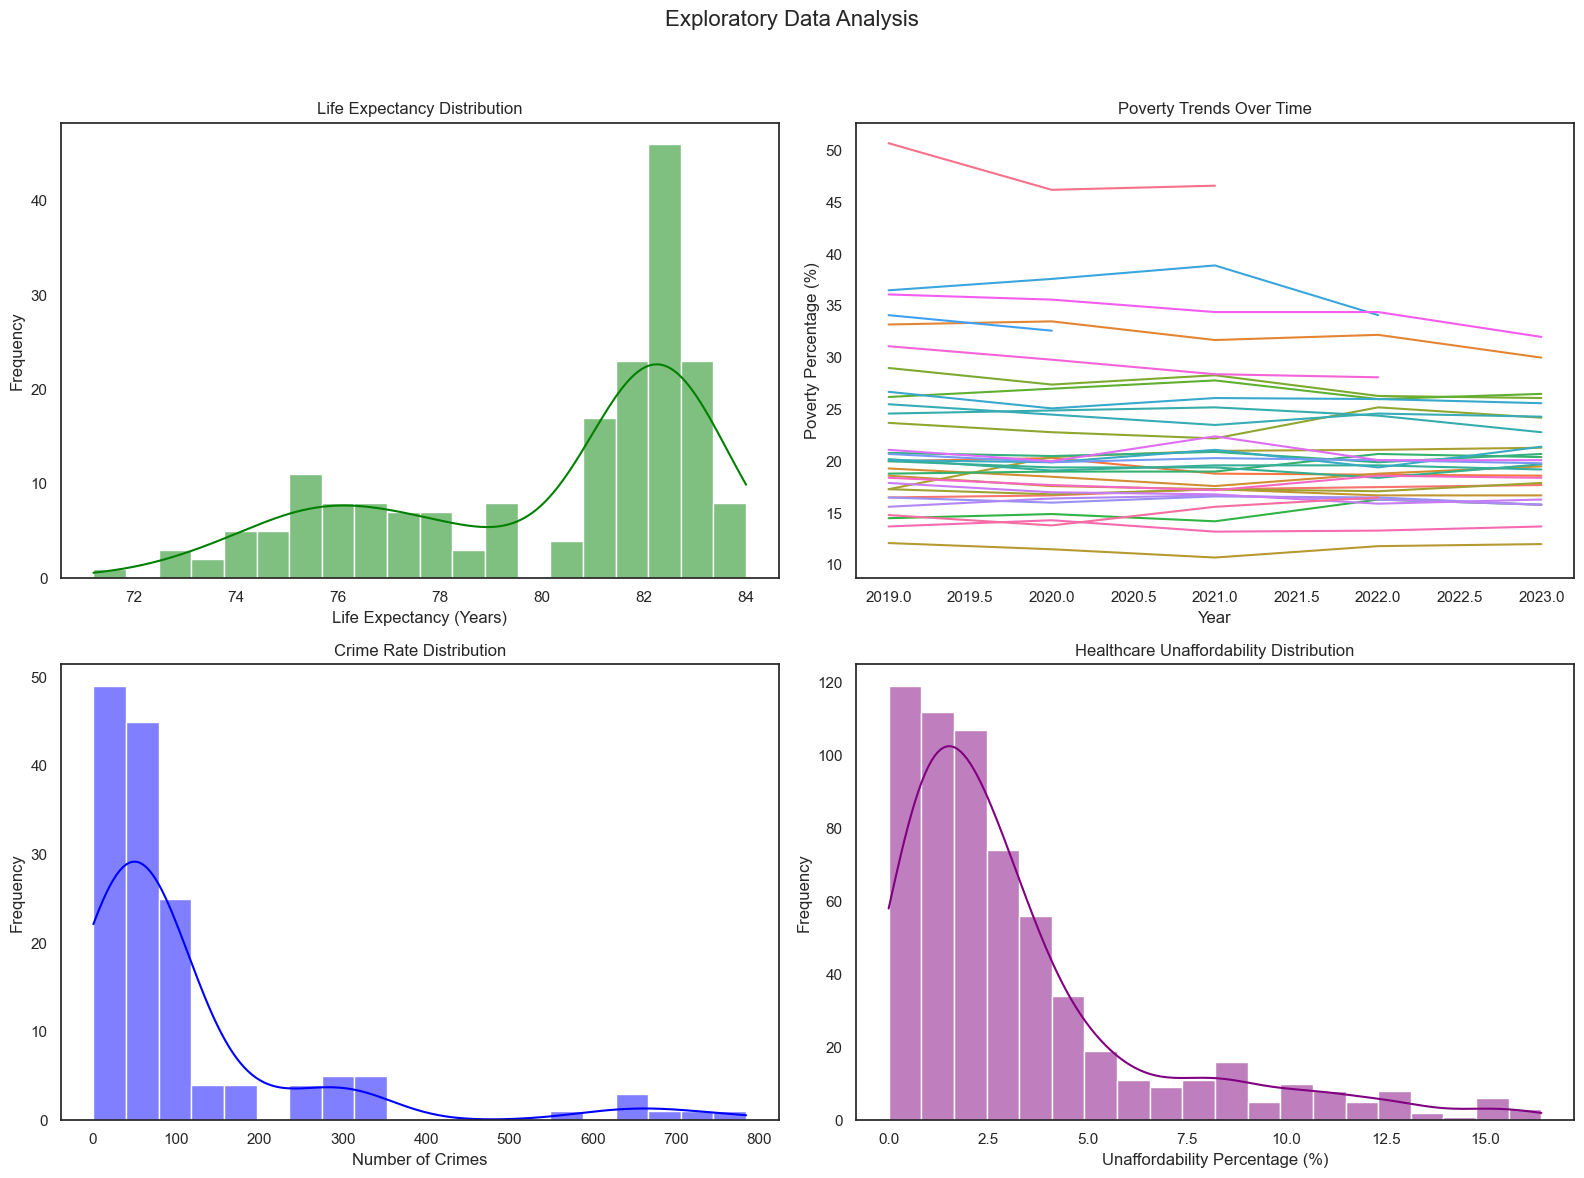

In [22]:
# Function to summarize datasets compactly
def summarize_dataset(df, name):
    print(f"--- {name} ---")
    print(f"Shape: {df.shape}")
    print("Missing Values:\n", df.isnull().sum(), "\n")
    display(df.describe().T[['mean', 'std', 'min', '50%', 'max']])

# Example: Summarize multiple datasets
summarize_dataset(life_exp_filtered, "Life Expectancy")
summarize_dataset(pov_filtered, "Poverty Levels")
summarize_dataset(crime_ffiltered, "Crime Rates")
summarize_dataset(unafordability_health_df, "Healthcare Unaffordability")
summarize_dataset(doctors_filtered, "Doctors per Country")

# Set plot style for consistency
sns.set(style="white")

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Exploratory Data Analysis", fontsize=16)

# 1. Life Expectancy Distribution
sns.histplot(
    life_exp_filtered['Life Expectancy'], 
    bins=20, 
    kde=True, 
    color='green', 
    ax=axes[0, 0]
)
axes[0, 0].set_title("Life Expectancy Distribution")
axes[0, 0].set_xlabel("Life Expectancy (Years)")
axes[0, 0].set_ylabel("Frequency")

# 2. Poverty Trends Over Time
sns.lineplot(
    data=pov_filtered, 
    x='TIME_PERIOD', 
    y='% Of Poverty', 
    hue='Country', 
    legend=False, 
    ax=axes[0, 1]
)
axes[0, 1].set_title("Poverty Trends Over Time")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Poverty Percentage (%)")

# 3. Crime Rate Distribution
sns.histplot(
    crime_ffiltered['Number of Crime'], 
    bins=20, 
    kde=True, 
    color='blue', 
    ax=axes[1, 0]
)
axes[1, 0].set_title("Crime Rate Distribution")
axes[1, 0].set_xlabel("Number of Crimes")
axes[1, 0].set_ylabel("Frequency")

# 4. Healthcare Unaffordability Distribution
sns.histplot(
    unafordability_health_df['% Of pop unfordable'], 
    bins=20, 
    kde=True, 
    color='purple', 
    ax=axes[1, 1]
)
axes[1, 1].set_title("Healthcare Unaffordability Distribution")
axes[1, 1].set_xlabel("Unaffordability Percentage (%)")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## **Research Question 1: How do mortality levels correlate with crime rates?**

### **Hypotheses**
- **Null Hypothesis (\(H_0\))**: There is no correlation between mortality levels and disparities in healthcare affordability.
- **Alternative Hypothesis (\(H_1\))**: There is a positive correlation between poverty levels and disparities in healthcare affordability.

### **Statistical Test**:
   - Pearson Correlation Coefficient was used to test the strength of the linear relationship between these variables.

In [23]:
crime_ffiltered.head()

,Country,TIME_PERIOD,Number of Crime
0,Albania,2018,51
1,Albania,2019,58
2,Albania,2020,52
3,Albania,2021,61
4,Albania,2022,42


In [24]:
mortality_filtered.head()

,Country,TIME_PERIOD,Morality
0,Albania,2013,20442
1,Albania,2014,20656
2,Albania,2015,22418
3,Albania,2016,21388
4,Albania,2017,22232


In [25]:
crime_ffiltered['TIME_PERIOD'] = crime_ffiltered['TIME_PERIOD'].astype(int)
mortality_filtered['TIME_PERIOD'] = mortality_filtered['TIME_PERIOD'].astype(int)

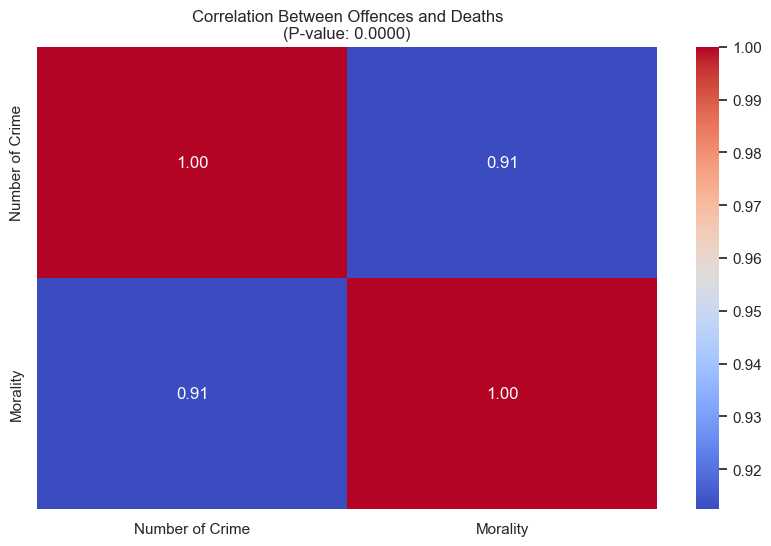

Pearson Correlation Coefficient: 0.91
P-value: 0.0000
We reject the null hypothesis. There is a statistically significant correlation between the number of crimes and mortality.


In [26]:
from scipy.stats import pearsonr

# Merge datasets
merged_data = pd.merge(crime_ffiltered, mortality_filtered, on=['Country', 'TIME_PERIOD'], how='inner')

# Drop rows with any remaining nulls (if necessary)
merged_data.dropna(inplace=True)

# Calculate Pearson Correlation Coefficient and p-value
correlation, p_value = pearsonr(merged_data['Number of Crime'], merged_data['Morality'])

# Display correlation matrix and heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    merged_data[['Number of Crime', 'Morality']].corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f'
)
plt.title(f'Correlation Between Offences and Deaths\n(P-value: {p_value:.4f})')
plt.show()

# Print correlation and p-value
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis Interpretation
if p_value < 0.05:
    print("We reject the null hypothesis. There is a statistically significant correlation between the number of crimes and mortality.")
else:
    print("We fail to reject the null hypothesis. There is no statistically significant correlation between the number of crimes and mortality.")


# Question 2: Do regions with higher crime rates experience higher mortality rates?
Hypothesis:  Poverty rate and unnaffordability of health are directly related.

In [27]:
pov_filtered

,Country,TIME_PERIOD,% Of Poverty
0,Albania,2019,50.7
1,Albania,2020,46.2
2,Albania,2021,46.6
12,Austria,2019,16.5
13,Austria,2020,16.7
...,...,...,...
1426,Slovenia,2023,13.7
1437,Slovakia,2019,14.8
1438,Slovakia,2020,13.8
1439,Slovakia,2021,15.6


In [28]:
unafordability_health_df

,Country,TIME_PERIOD,% Of pop unfordable
0,Albania,2017,13.1
1,Albania,2018,14.8
2,Albania,2019,14.6
3,Albania,2020,10.6
4,Albania,2021,10.7
...,...,...,...
611,United Kingdom,2016,1.0
612,United Kingdom,2017,3.3
613,United Kingdom,2018,4.5
614,Kosovo*,2018,10.0


In [29]:
# Merge the two datasets on 'Region' and 'Year'
pov_hlth_merge = pd.merge(pov_filtered, unafordability_health_df, on=['Country', 'TIME_PERIOD'], how='inner')
pov_hlth_merge[pov_hlth_merge['Country'] == 'Latvia']

,Country,TIME_PERIOD,% Of Poverty,% Of pop unfordable
98,Latvia,2019,26.7,4.3
99,Latvia,2020,25.1,5.3
100,Latvia,2021,26.1,4.0
101,Latvia,2022,26.0,5.4
102,Latvia,2023,25.6,7.8


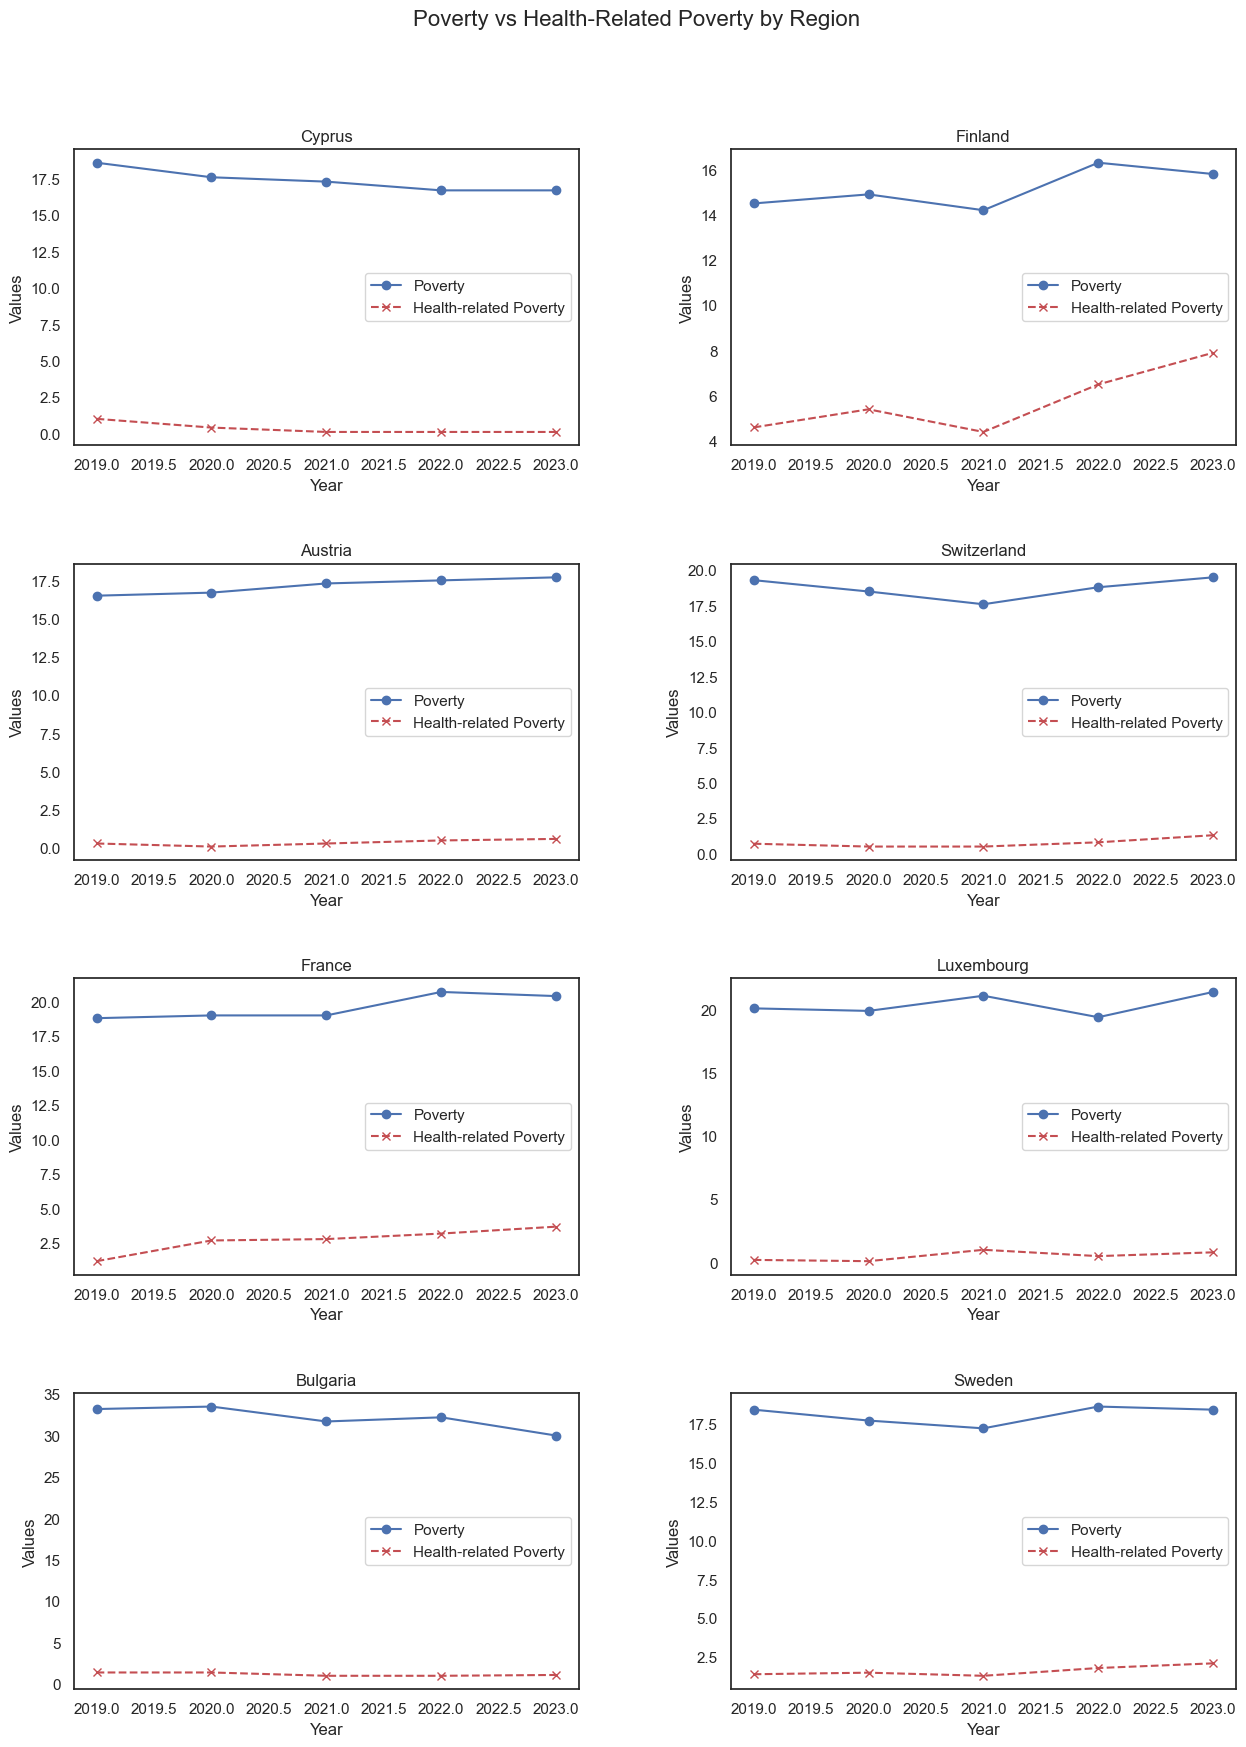

Top 10 Correlated Regions:

        Country  Correlation
5        Cyprus     0.947119
9       Finland     0.850913
1       Austria     0.812559
33  Switzerland     0.748222
10       France     0.742850
19   Luxembourg     0.730504
3      Bulgaria     0.676656
32       Sweden     0.652964


In [30]:

# Compute correlation between poverty and health-related poverty for each region
correlation_by_region = (
    pov_hlth_merge.groupby('Country')[['% Of Poverty', '% Of pop unfordable']].corr().iloc[0::2, -1].reset_index().rename(columns={'% Of pop unfordable': 'Correlation'})
)

# Sort regions by correlation and select the top 10
top_correlated_regions = correlation_by_region.sort_values('Correlation', ascending=False).head(10).iloc[2:]

# Visualization
num_regions = len(top_correlated_regions)
num_cols = 2  # Number of columns for the grid
num_rows = (num_regions + 1) // num_cols  # Calculate rows based on the number of regions

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
fig.suptitle("Poverty vs Health-Related Poverty by Region", fontsize=16, y=0.95)
axes = axes.flatten()

# Loop each top-correlated region and plot its data
for idx, region in enumerate(top_correlated_regions['Country']):
    ax = axes[idx]
    
    # Filter the dataset for the current region
    region_data = pov_hlth_merge[pov_hlth_merge['Country'] == region]
    
    # Plot poverty and health-related poverty trends over time
    ax.plot(region_data['TIME_PERIOD'], region_data['% Of Poverty'], label='Poverty', marker='o', linestyle='-', color='b')
    ax.plot(region_data['TIME_PERIOD'], region_data['% Of pop unfordable'], label='Health-related Poverty', marker='x', linestyle='--', color='r')
    ax.grid(False)
    # Add titles and labels for the current subplot
    ax.set_title(f'{region}', fontsize=12)
    ax.set_xlabel('Year')
    ax.set_ylabel('Values')
    ax.legend()


plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

print("Top 10 Correlated Regions:\n")
print(top_correlated_regions[['Country', 'Correlation']])

# Question 3: How does poverty determine access to healthcare services and their use in various European regions?

In [31]:
unafordability_health_df.head()

,Country,TIME_PERIOD,% Of pop unfordable
0,Albania,2017,13.1
1,Albania,2018,14.8
2,Albania,2019,14.6
3,Albania,2020,10.6
4,Albania,2021,10.7


In [32]:
# europe map visualisation
import geopandas as gpd
# load geo
europe_geo = gpd.read_file("europe.geojson")

#filter to only include countries already in the dataset
europe_geo_filtered = europe_geo[europe_geo['NAME'].isin(eu_countries)]
# Merge  data with the filtered Geodf
merged_data = europe_geo_filtered.merge(pov_filtered, left_on="NAME", right_on="Country")
merged_data2 = merged_data.merge(unafordability_health_df, on=['Country','TIME_PERIOD'],how='inner')

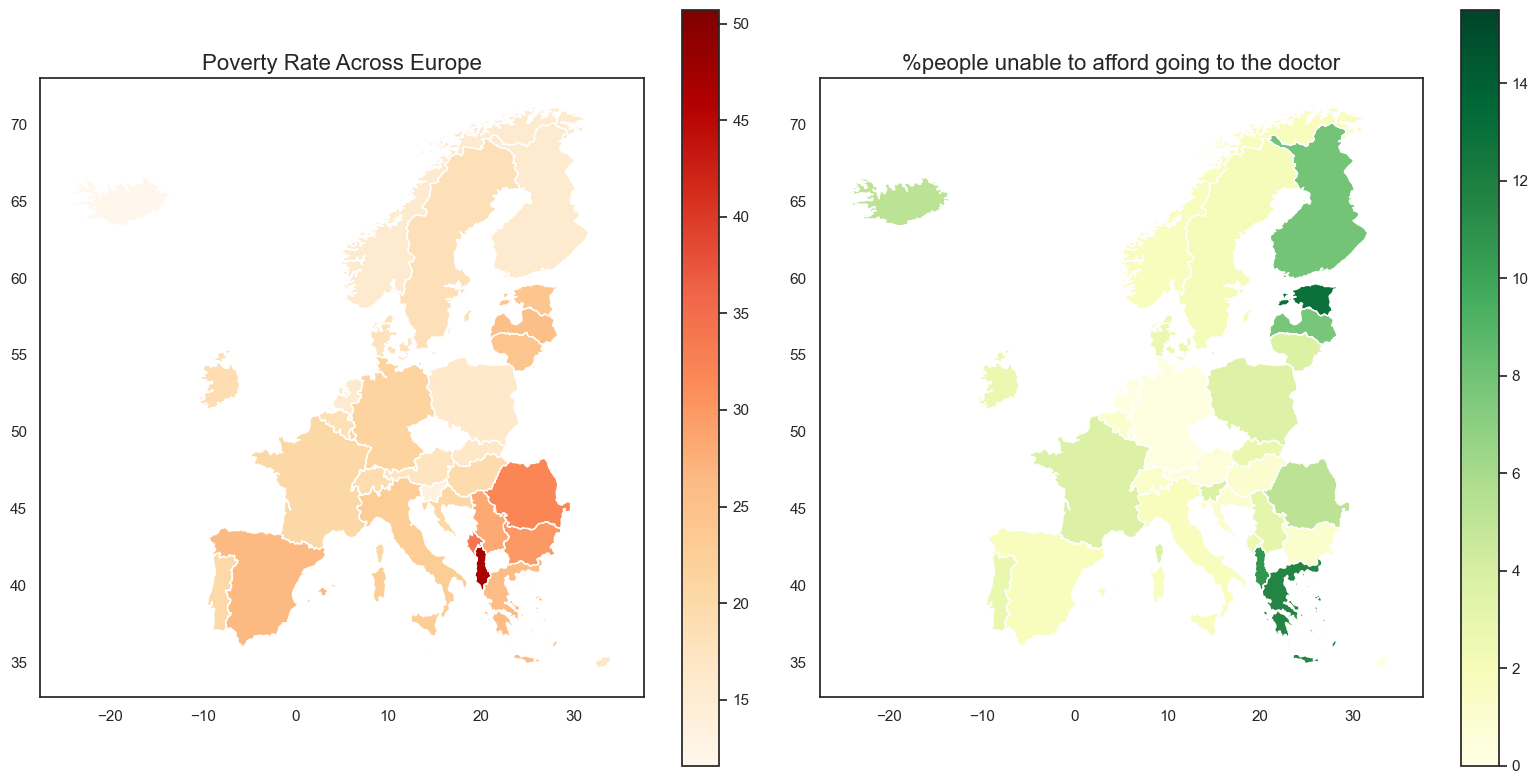

In [33]:
#create the figure with two subplots 
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

#poverty rate map
merged_data.plot(column='% Of Poverty', cmap='OrRd', legend=True, ax=axes[0])
axes[0].set_title('Poverty Rate Across Europe', fontsize=16)

#healthcare access map
merged_data2.plot(column='% Of pop unfordable', cmap='YlGn', legend=True, ax=axes[1])
axes[1].set_title('%people unable to afford going to the doctor', fontsize=16)
plt.tight_layout()
plt.show()

# Question 4: What is the connection between criminal activity and the level of medical resource availability in those areas?

In [34]:
crime_ffiltered['TIME_PERIOD'] = crime_ffiltered['TIME_PERIOD'].astype(int)
q2_merged = crime_ffiltered.merge(doctors_filtered, on=['Country','TIME_PERIOD'], how='inner')
q2_merged = q2_merged.merge(nbr_bed_filtered, on=['Country','TIME_PERIOD'], how='inner')

In [35]:
q2_merged

,Country,TIME_PERIOD,Number of Crime,Nbr od doctors,Number Beds
0,Austria,2018,73,46115.0,64285.0
1,Austria,2019,74,46987.0,63838.0
2,Austria,2020,54,47422.0,62873.0
3,Austria,2021,59,48443.0,61927.0
4,Austria,2022,65,49242.0,60739.0
...,...,...,...,...,...
100,Slovakia,2018,67,19178.0,31026.0
101,Slovakia,2019,76,19454.0,31422.0
102,Slovakia,2020,63,20026.0,31016.0
103,Slovakia,2021,55,20047.0,30911.0


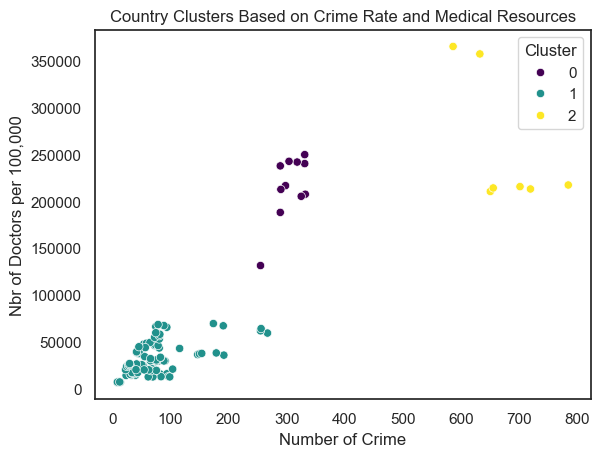

In [36]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features
features = q2_merged[['Number of Crime', 'Nbr od doctors', 'Number Beds']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
q2_merged['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.scatterplot(data=q2_merged, x='Number of Crime', y='Nbr od doctors', hue='Cluster', palette='viridis')
plt.title("Country Clusters Based on Crime Rate and Medical Resources")
plt.xlabel('Number of Crime')  # Fixed the missing closing quote
plt.ylabel('Nbr of Doctors per 100,000')
plt.show()


### Cluster 0 (Purple):
Countries with lower crime rates and varying numbers of doctors per 100,000.
### Cluster 1 (Teal):
Countries with medium crime rates and very high numbers of docto.
### Cluster 2 (Yellow):
Countries with high crime rates and relatively fewer doctors.

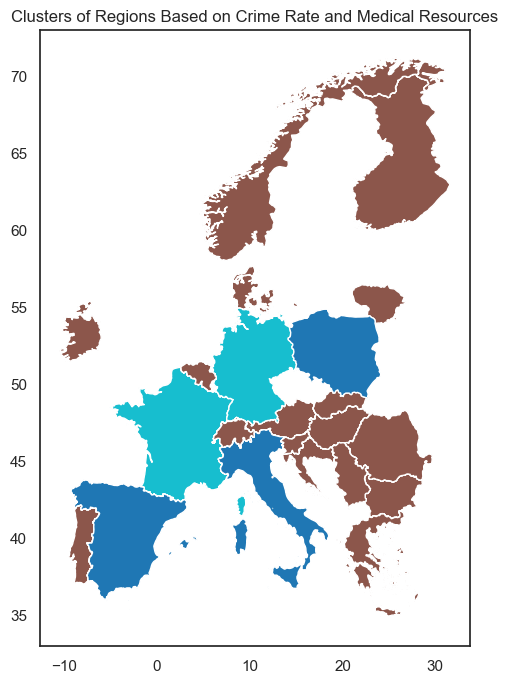

In [37]:

cluster_map_data = europe_geo_filtered.merge(q2_merged, left_on="NAME", right_on="Country")
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
cluster_map_data.plot(column='Cluster', cmap='tab10', legend=False, ax=ax)
plt.title('Clusters of Regions Based on Crime Rate and Medical Resources')
plt.show()

Hypotheses for Results:

### Brown Regions:
Predominantly covers Eastern European and some Northern European countries.
Represents areas with lower medical resource availability and/or lower crime rates.

### Blue Regions:
Covers Central and Western European countries like France, Germany.
They have higher medical resources and lower crime rates, reflecting strong healthcare systems and stable socio-economic conditions.

### Sky Blue cluster (Italy, Spain, Poland) 
It reflects regions with good but slightly lower medical resource availability and higher crime rates, likely driven by regional disparities and socio-economic challenges.


# Question 5: How do regional disparities in healthcare resources affect health outcomes?

In [38]:
merge_df =  pd.merge(nbr_bed_filtered,doctors_filtered,on=['Country','TIME_PERIOD'], how='inner')

In [39]:
merge_df =  pd.merge(merge_df,unafordability_health_df,on=['Country','TIME_PERIOD'], how='inner')

In [40]:
merge_df =  pd.merge(merge_df,life_exp_filtered,on=['Country','TIME_PERIOD'], how='inner')

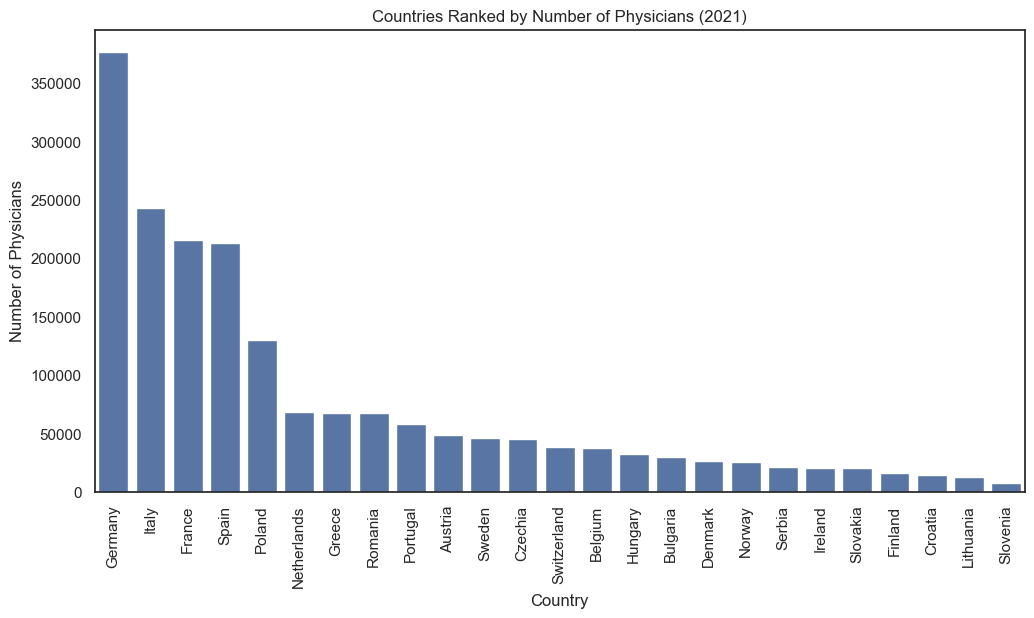

In [41]:
# Country Ranking for Healthcare Indicators
country_data_2021 = merge_df[merge_df['TIME_PERIOD'] == 2021]
country_data_2021_sorted = country_data_2021.sort_values(by='Nbr od doctors', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=country_data_2021_sorted, x='Country', y='Nbr od doctors')
plt.title('Countries Ranked by Number of Physicians (2021)')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Physicians')
plt.show()


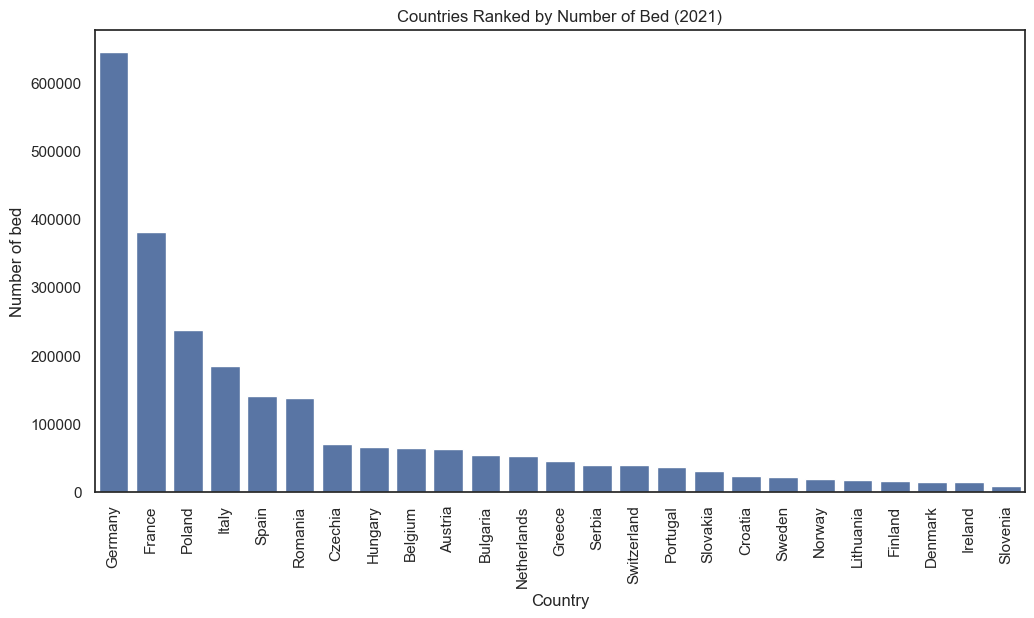

In [42]:
# Country Ranking for Healthcare Indicators
country_data_2021 = merge_df[merge_df['TIME_PERIOD'] == 2021]
country_data_2021_sorted = country_data_2021.sort_values(by='Number Beds', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=country_data_2021_sorted, x='Country', y='Number Beds')
plt.title('Countries Ranked by Number of Bed (2021)')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of bed')
plt.show()

# Question 6: How life Expectancy and affordability rates related
Hypothesis: Life expectancy and affordability are inversly related.

In [43]:
merged_df = pd.merge(life_exp_filtered, unafordability_health_df, on=['Country', 'TIME_PERIOD'], how='inner')
merged_df.head()

,Country,TIME_PERIOD,Life Expectancy,% Of pop unfordable
0,Albania,2018,78.9,14.8
1,Albania,2019,79.1,14.6
2,Albania,2020,77.4,10.6
3,Albania,2021,75.5,10.7
4,Albania,2022,79.1,10.2


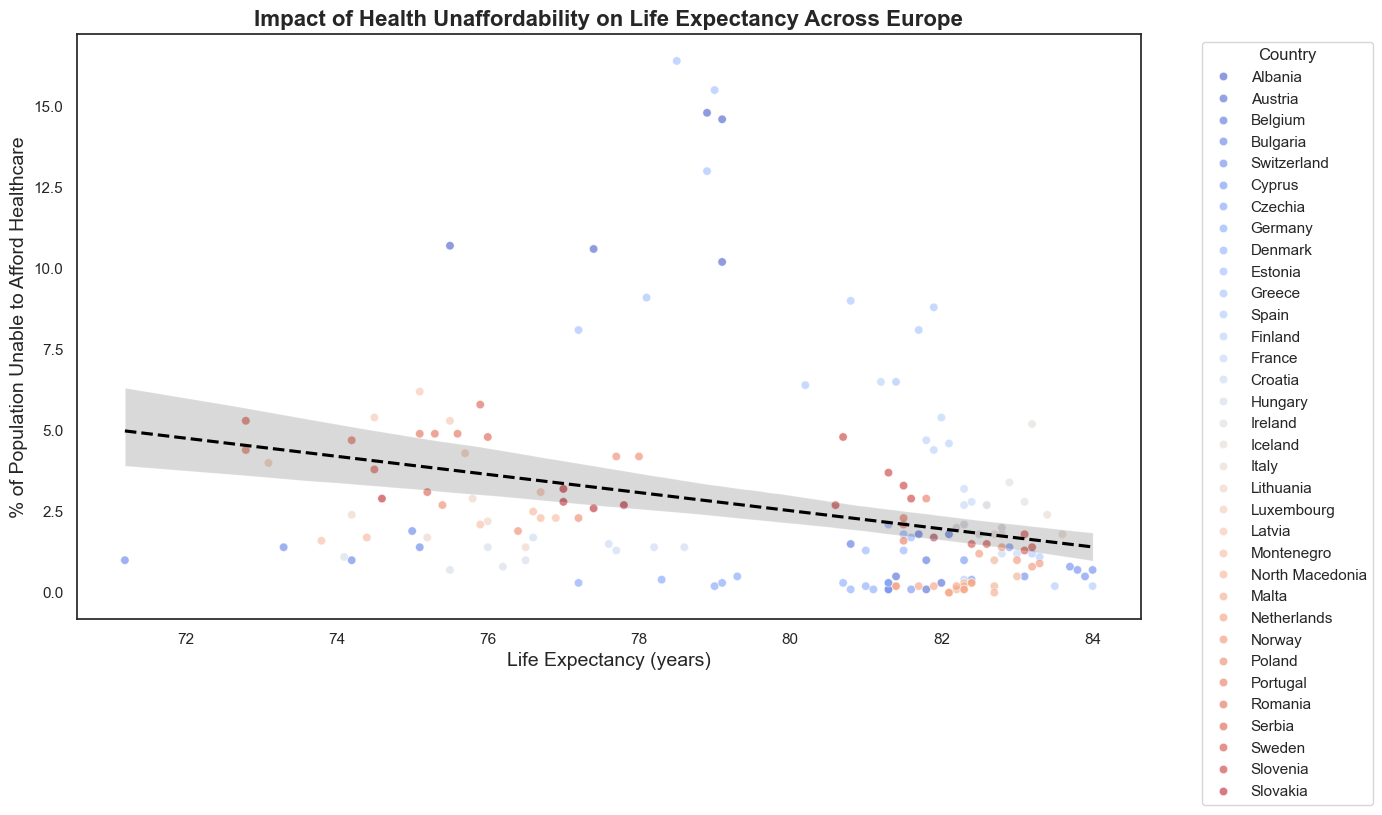

In [44]:
# Bubble plot
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=merged_df,
    x='Life Expectancy',
    y='% Of pop unfordable',
    hue='Country',  # colors for countries
    sizes=(100, 1000),
    alpha=0.6,
    palette='coolwarm'
)

# Add a regression line
sns.regplot(
    data=merged_df,
    x='Life Expectancy',
    y='% Of pop unfordable',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--'}
)

plt.title('Impact of Health Unaffordability on Life Expectancy Across Europe', fontsize=16, weight='bold')
plt.xlabel('Life Expectancy (years)', fontsize=14)
plt.ylabel('% of Population Unable to Afford Healthcare', fontsize=14)
plt.grid(False)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Question 7: How is the unaffordable Healthcare percentage related with health Spending per Capita?
Hypothesis: The unaffordable Healthcare percentage is positively correlated with health Spending per Capita.

In [45]:
percentage_gdp_filtered['TIME_PERIOD'] = percentage_gdp_filtered['TIME_PERIOD'].astype(str)
insurance_filtered['TIME_PERIOD'] = insurance_filtered['TIME_PERIOD'].astype(str)
unafordability_health_df['TIME_PERIOD'] = unafordability_health_df['TIME_PERIOD'].astype(str)

In [46]:
merged_df1 = pd.merge(percentage_gdp_filtered, insurance_filtered, on=['Country', 'TIME_PERIOD'], how='inner')
merged_df2 = pd.merge(merged_df1, unafordability_health_df, on=['Country', 'TIME_PERIOD'], how='inner')
merged_df2.head()

,Country,TIME_PERIOD,% gdp spent on health,% of population covered by insurance,% Of pop unfordable
0,Albania,2018,12.08,44.456708,14.8
1,Croatia,2014,21.44,52.556217,3.3
2,Poland,2015,19.42,43.916502,7.3
3,Poland,2016,21.09,44.502171,6.6
4,Poland,2017,20.32,41.782441,3.3


In [47]:
percentage_gdp_filtered['TIME_PERIOD'] = percentage_gdp_filtered['TIME_PERIOD'].astype(str)
unafordability_health_df['TIME_PERIOD'] = unafordability_health_df['TIME_PERIOD'].astype(str)

merged_df4 = pd.merge(percentage_gdp_filtered, unafordability_health_df, on=['Country', 'TIME_PERIOD'], how='inner')
merged_df4 = merged_df4[merged_df4['TIME_PERIOD'] == '2021']
merged_df4.head()

,Country,TIME_PERIOD,% gdp spent on health,% Of pop unfordable
3,Albania,2021,13.05,10.7
15,Austria,2021,32.83,0.3
27,Belgium,2021,30.00,1.7
39,Bulgaria,2021,18.89,1.0
51,Switzerland,2021,29.72,0.5


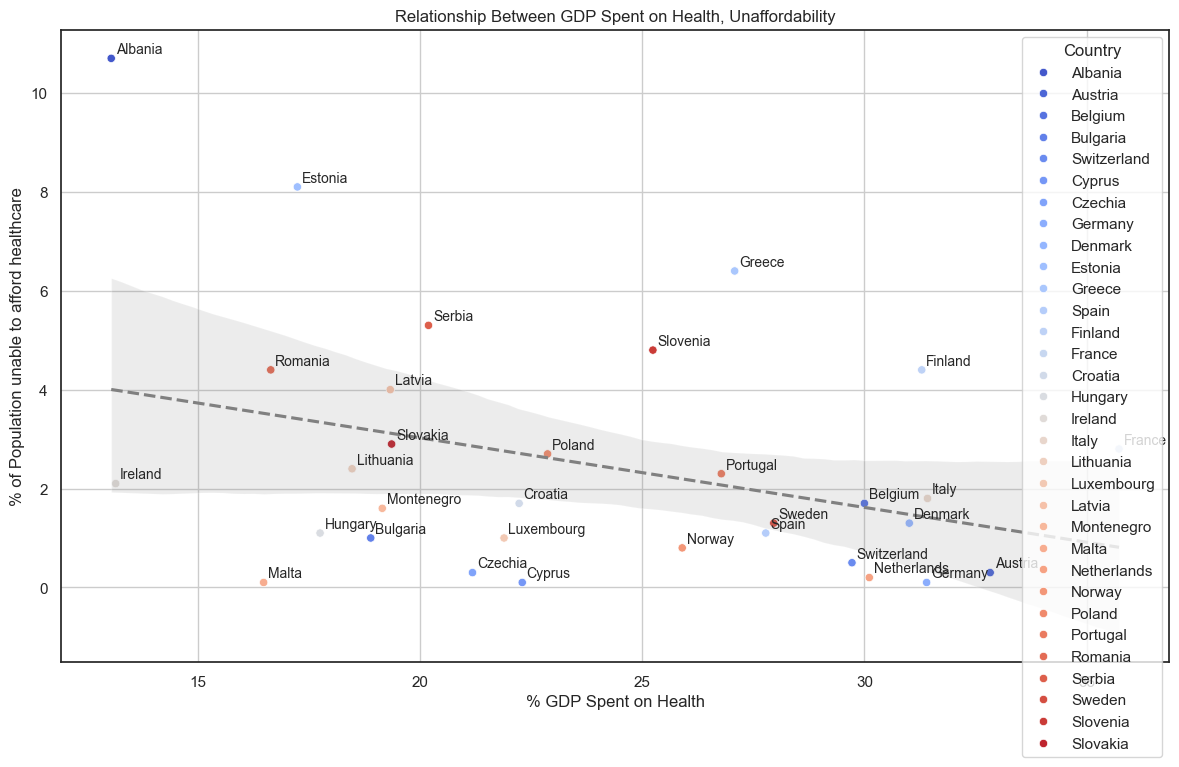

In [58]:

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=merged_df4,
    x='% gdp spent on health',
    y='% Of pop unfordable',
    hue='Country',
    sizes=(100, 1000),
    palette='coolwarm',
    legend='brief'
)

for i in range(len(merged_df4)):
    plt.text(
        merged_df4['% gdp spent on health'].iloc[i] + 0.1,  # Offset text slightly for clarity
        merged_df4['% Of pop unfordable'].iloc[i] + 0.1,
        merged_df4['Country'].iloc[i],
        fontsize=10
    )

sns.regplot(
    data=merged_df4,
    x='% gdp spent on health',
    y='% Of pop unfordable',
    scatter=False,
    color='gray',
    line_kws={'linestyle': 'dashed'}
)

plt.title('Relationship Between GDP Spent on Health, Unaffordability')
plt.xlabel('% GDP Spent on Health')
plt.ylabel('% of Population unable to afford healthcare')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# The social and health quality score of countries based on given datasets:

In [49]:
doctors_filtered['TIME_PERIOD'] = pd.to_numeric(doctors_filtered['TIME_PERIOD'], errors='coerce')
nbr_bed_filtered['TIME_PERIOD'] = pd.to_numeric(nbr_bed_filtered['TIME_PERIOD'], errors='coerce')
unafordability_health_df['TIME_PERIOD'] = pd.to_numeric(unafordability_health_df['TIME_PERIOD'], errors='coerce')
life_exp_filtered['TIME_PERIOD'] = pd.to_numeric(life_exp_filtered['TIME_PERIOD'], errors='coerce')
crime_ffiltered['TIME_PERIOD'] = pd.to_numeric(crime_ffiltered['TIME_PERIOD'], errors='coerce')
mortality_filtered['TIME_PERIOD'] = pd.to_numeric(mortality_filtered['TIME_PERIOD'], errors='coerce')
pov_filtered['TIME_PERIOD'] = pd.to_numeric(pov_filtered['TIME_PERIOD'], errors='coerce')

In [50]:
from functools import reduce

# list of df to merge
dfs = [doctors_filtered, nbr_bed_filtered, unafordability_health_df, life_exp_filtered]  # Add all your DataFrames here
merged_df = reduce(lambda left, right: pd.merge(left, right, on=['TIME_PERIOD', 'Country'], how='inner'), dfs)
print(merged_df)


      Country  TIME_PERIOD  Nbr od doctors  Number Beds  % Of pop unfordable  \
0     Austria         2018         46115.0      64285.0                  0.1   
1     Austria         2019         46987.0      63838.0                  0.3   
2     Austria         2020         47422.0      62873.0                  0.1   
3     Austria         2021         48443.0      61927.0                  0.3   
4     Austria         2022         49242.0      60739.0                  0.5   
..        ...          ...             ...          ...                  ...   
120  Slovakia         2018         19178.0      31026.0                  2.6   
121  Slovakia         2019         19454.0      31422.0                  2.7   
122  Slovakia         2020         20026.0      31016.0                  3.2   
123  Slovakia         2021         20047.0      30911.0                  2.9   
124  Slovakia         2022         20234.0      30914.0                  2.8   

     Life Expectancy  
0               

In [51]:
from sklearn.preprocessing import MinMaxScaler

#columns to scale
columns_to_scale = ['Nbr od doctors', 'Number Beds', '% Of pop unfordable', 'Life Expectancy']
scaler = MinMaxScaler()

# only 2022
merged_df_2022 = merged_df[merged_df['TIME_PERIOD'] == 2022].reset_index(drop=True)

#scle the  columns for 2022
merged_df_2022[columns_to_scale] = scaler.fit_transform(merged_df_2022[columns_to_scale])

# calcululate the Health Access Score for 2022
merged_df_2022['Health_Access_Score'] = merged_df_2022[columns_to_scale].mean(axis=1) * 100

# Check the results for 2022
print(merged_df_2022[['Country', 'TIME_PERIOD', 'Health_Access_Score']].head())

       Country  TIME_PERIOD  Health_Access_Score
0      Austria         2022            24.667981
1      Belgium         2022            26.509620
2     Bulgaria         2022             5.586323
3  Switzerland         2022            30.046803
4      Czechia         2022            17.645149


In [52]:
pov_filtered.head()

,Country,TIME_PERIOD,% Of Poverty
0,Albania,2019,50.7
1,Albania,2020,46.2
2,Albania,2021,46.6
12,Austria,2019,16.5
13,Austria,2020,16.7


In [53]:
# list of df to merge
dfs = [crime_ffiltered, mortality_filtered, pov_filtered]
merged_social_df = reduce(lambda left, right: pd.merge(left, right, on=['TIME_PERIOD', 'Country'], how='inner'), dfs)
print(merged_social_df)

      Country  TIME_PERIOD  Number of Crime  Morality  % Of Poverty
0     Albania         2019               58     21937          50.7
1     Albania         2020               52     27605          46.2
2     Albania         2021               61     30507          46.6
3     Austria         2019               74     83386          16.5
4     Austria         2020               54     91599          16.7
..        ...          ...              ...       ...           ...
133  Slovenia         2022               13     22492          13.3
134  Slovakia         2019               76     53234          14.8
135  Slovakia         2020               63     59089          13.8
136  Slovakia         2021               55     73461          15.6
137  Slovakia         2022               41     59583          16.5

[138 rows x 5 columns]


In [54]:
#columns to scale
columns_to_scale = ['Number of Crime', 'Morality', '% Of Poverty']
scaler = MinMaxScaler()

# only 2022
merged2_df_2022 = merged_social_df[merged_social_df['TIME_PERIOD'] == 2022].reset_index(drop=True)

#scle the  columns for 2022
merged2_df_2022[columns_to_scale] = scaler.fit_transform(merged2_df_2022[columns_to_scale])

# calcululate the Health Access Score for 2022
merged2_df_2022['Social score'] = merged2_df_2022[columns_to_scale].mean(axis=1) * 100

# Check the results for 2022
print(merged2_df_2022[['Country', 'TIME_PERIOD', 'Social score']].head())



       Country  TIME_PERIOD  Social score
0      Austria         2022     15.087674
1      Belgium         2022     22.830504
2     Bulgaria         2022     38.435322
3  Switzerland         2022     15.132214
4       Cyprus         2022      7.387011


In [55]:
# Merge  data with the filtered Geodf
merged_data_map_health = europe_geo_filtered.merge(merged_df_2022, left_on="NAME", right_on="Country")
merged_data_map_soc = europe_geo_filtered.merge(merged2_df_2022,  left_on="NAME", right_on="Country")

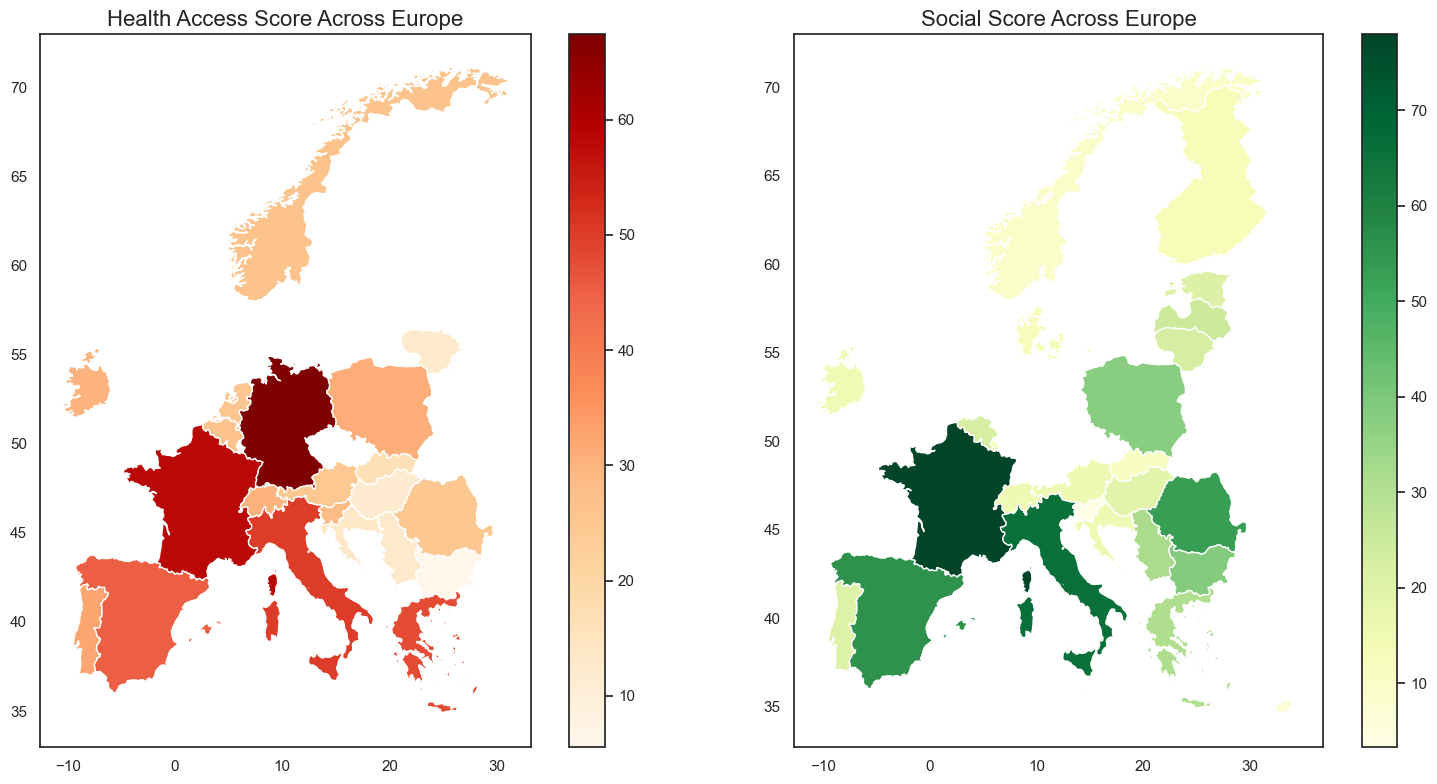

In [56]:
#create the figure with two subplots 
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

#poverty rate map
merged_data_map_health.plot(column='Health_Access_Score', cmap='OrRd', legend=True, ax=axes[0])
axes[0].set_title('Health Access Score Across Europe', fontsize=16)

#healthcare access map
merged_data_map_soc.plot(column='Social score', cmap='YlGn', legend=True, ax=axes[1])
axes[1].set_title('Social Score Across Europe', fontsize=16)
plt.tight_layout()
plt.show()


<h1 style="text-align:center;">Potential products or how to convert this project to a service or product</h1>

Create a platform or consulting service that analyzes poverty, healthcare access, crime rates, and other socioeconomic indicators to give governments, NGOs, and organizations relevant information. The service would make it possible to make data-driven decisions about important topics like public safety, healthcare access, and inequality.

- Visual dashboards to monitor socioeconomic and healthcare trends in real-time.
- Predictive models to identify regions at high risk of poor health outcomes.
- Customizable reports for NGOs, governments, and healthcare organizations.

Key Features:
- Interactive maps showing disparities in poverty, crime, and healthcare access.
- Forecasting tools for health-related outcomes based on poverty and crime statistics.
- Alerts for regions experiencing worsening trends.


<h1 style="text-align:center;">Any issues related to data engineering.</h1>

- Missing values in datasets.
- Inconsistent formatting or units.
- Outliers skewing results.
- Different time range for some regions

<h1 style="text-align:center;">Conclusion.</h1>

- Regions with higher crime rates may also have higher mortality rates. This could point to indirect effects of crime on public health or living conditions
- It  was proven that as poverty rates increase, a larger proportion of the population faces difficulty affording healthcare.
- It was proven that the geographic disparity in poverty and healthcare access, indicating a potential need for policy interventions in poverty-stricken areas since higher poverty rates are concentrated in southern and eastern European regions and often show lower percentages of people accessing healthcare when sick.
- Regions with higher health spending per capita tend to have a lower percentage of unaffordable healthcare, as increased spending improves healthcare accessibility and affordability
- Countries with high life expectancy were found to have a high level of health care affordability.
- The data shows that socioeconomic status, healthcare access, and are connected across Europe. Poverty and limited healthcare often lead to higher crime and death rates. Improving healthcare access and economic stability could help public health and safety.